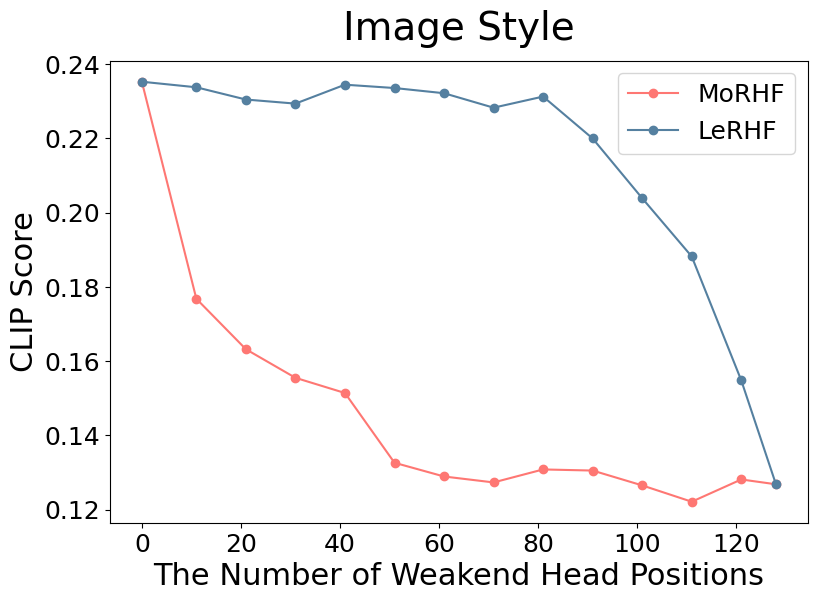

In [1]:
"""HP plot for paper"""
import pandas as pd
import matplotlib.pyplot as plt
import os
# Specify the followings
sdxl = False # If False, SD v1.4 is used. If True, SDXL is used.
exp_nums = [5] # exp_num in "hp_outputs" (exp_num, which was used in the "hp_construct_prompts.ipynb")
concepts = "Image Style".split(", ") # The concept you want to plot
# -------------------------------- #

directory_path = './hp_results'
plot_directory = "./hp_plots_for_paper"
os.makedirs(plot_directory, exist_ok=True)
name = "wo_category"

csv_paths = [os.path.join(directory_path, f"hp_scores_{name}_exp_{exp_num}.csv")for exp_num in exp_nums]



for idx, csv_path in enumerate(csv_paths):
    data = pd.read_csv(csv_path)
    if not sdxl:
        top_data = data[data['Key'].str.startswith('top') & (data['Key'] != 'top_1')]
        bottom_data = data[data['Key'].str.startswith('bottom') & (data['Key'] != 'bottom_1')]
    else:
        top_data = data[data['Key'].str.startswith('top') & (data['Key'] != 'top_1') & (data['Key'] != 'top_11')]
        bottom_data = data[data['Key'].str.startswith('bottom') & (data['Key'] != 'bottom_1') & (data['Key'] != 'bottom_11')]

    # Extract x and y values for top and bottom
    top_x = top_data['Key'].str.extract(r'top_(\d+)').astype(int).values.flatten()
    top_y = top_data['Value'].values

    bottom_x = bottom_data['Key'].str.extract(r'bottom_(\d+)').astype(int).values.flatten()
    bottom_y = bottom_data['Value'].values

    # Plot the data
    plt.figure(figsize=(9, 6))
    plt.plot(top_x, top_y, label='MoRHF', marker='o', color="#FE7773")
    plt.plot(bottom_x, bottom_y, label='LeRHF', marker='o', color = "#5580A0")

   

    # Add labels and title
    plt.xlabel('The Number of Weakend Head Positions', fontsize=22)
    plt.ylabel('CLIP Score', fontsize=22)
    plt.title(f'{concepts[idx].replace("_ood", "")}', fontsize=28, pad=15)
    plt.legend(fontsize=18, loc='upper right')

    # Increase font size for tick values
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)

    # Save the plot
    plot_path = os.path.join(plot_directory, f'plot_{name}_{concepts[idx]}.png')
    plt.savefig(plot_path, bbox_inches='tight', pad_inches=0.1)
    plt.show()
    plt.close()
    # Display the plot